In [1]:
import numpy as np

# ----------------------------
# STEP 1: Define parameters
# ----------------------------

S0 = 6.0         # Current stock price (£6)
K = 10.0         # Strike price (£10)
T = 3            # Time to maturity (3 years)
r = 0.01         # Risk-free interest rate (1% annually)
u = 1.5          # Up factor (share price increases 50%)
d = 0.8          # Down factor (share price decreases 20%)
N = 3            # Number of steps in the binomial tree

# ----------------------------
# STEP 2: Calculate derived values
# ----------------------------

dt = T / N                                # Time per step (1 year in this case)
p = (1 + r - d) / (u - d)                 # Risk-neutral probability
discount_factor = 1 / ((1 + r) ** dt)     # Per-step discount factor

# ----------------------------
# STEP 3: Build the stock price tree
# ----------------------------

# Create an (N+1)x(N+1) array initialized with zeros
stock_tree = np.zeros((N + 1, N + 1))

# Fill in the tree from top to bottom
for i in range(N + 1):            # For each time step
    for j in range(i + 1):        # For each possible number of down moves at that step
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

# ----------------------------
# STEP 4: Calculate the option payoff at maturity (European Call)
# ----------------------------

# Create a second tree for option values (same shape as stock_tree)
option_tree = np.zeros_like(stock_tree)

# Compute payoff at final nodes (i.e., at year 3)
for j in range(N + 1):
    option_tree[j, N] = max(0, stock_tree[j, N] - K)

# ----------------------------
# STEP 5: Backward induction to get option value today
# ----------------------------

# Work backwards from maturity to the present
for i in range(N - 1, -1, -1):           # From year 2 to 0
    for j in range(i + 1):               # Each node at that time
        expected_value = (p * option_tree[j, i + 1] +
                          (1 - p) * option_tree[j + 1, i + 1])
        option_tree[j, i] = discount_factor * expected_value

# ----------------------------
# STEP 6: Output final result
# ----------------------------

option_price = option_tree[0, 0]
print(f"European Call Option Value using 3-step Binomial Tree: £{option_price:.4f}")



European Call Option Value using 3-step Binomial Tree: £0.4154


In [17]:
import numpy as np

# --- Step 1: Parameters for Mansory PLC ---
S0 = 6.0        # Initial stock price
K = 10.0        # Strike price
T = 3           # Maturity in years
r = 0.01        # Risk-free rate
u = 1.5         # Up factor
d = 0.8         # Down factor
N = 3           # Number of steps
payoff = "call" # Option type

# --- Step 2: Build Stock Price Tree (S) ---
S = np.zeros((N + 1, N + 1))  # Stock prices

for i in range(N + 1):
    for j in range(i + 1):
        S[j, i] = S0 * (u ** (i - j)) * (d ** j)

# --- Step 3: Terminal Payoff (V) at Maturity ---
S_T = S[:, -1]  # Final column: terminal stock prices
V = np.zeros_like(S)  # Option value tree, same shape

if payoff == "call":
    V[:, -1] = np.maximum(S_T - K, 0.0)  # Call option payoff
elif payoff == "put":
    V[:, -1] = np.maximum(K - S_T, 0.0)  # Put option payoff

# --- Step 4: Display Matrix ---
print(V)


[[ 0.    0.    0.   10.25]
 [ 0.    0.    0.    0.8 ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]


In [29]:
import numpy as np

def binomial_tree_call(S0, K, T, r, sigma, N):
    """
    Prices a European call option using a binomial tree with volatility-based scaling.
    
    Parameters:
    S0    : Current stock price
    K     : Strike price
    T     : Time to maturity (years)
    r     : Risk-free interest rate (annual, as decimal)
    sigma : Annual volatility (as decimal)
    N     : Number of steps in the binomial tree

    Returns:
    The estimated option price at time 0.
    """
    dt = T / N                         # Time per step
    u = np.exp(sigma * np.sqrt(dt))   # Up factor
    d = 1 / u                          # Down factor
    p = (np.exp(r * dt) - d) / (u - d) # Risk-neutral probability
    discount = np.exp(-r * dt)        # Discount per step

    # Step 1: Stock prices at maturity
    ST = np.array([S0 * (u ** (N - i)) * (d ** i) for i in range(N + 1)])

    # Step 2: Option payoffs at maturity
    option_values = np.maximum(ST - K, 0)

    # Step 3: Work backwards through the tree
    for _ in range(N):
        option_values = discount * (p * option_values[:-1] + (1 - p) * option_values[1:])

    return option_values[0]


# === Input parameters for Mansory PLC ===
S0 = 6.0        # Current stock price (£)
K = 10.0        # Strike price (£)
T = 3           # Time to maturity in years
r = 0.01        # Risk-free rate (1%)
sigma = 0.5     # Estimated volatility (50%)
N = 50          # Number of steps in binomial tree

# Run the model
binomial_price = binomial_tree_call(S0, K, T, r, sigma, N)

# Print the result
print(f"European Call Option Price using 50-step Binomial Tree: £{binomial_price:.4f}")


European Call Option Price using 50-step Binomial Tree: £1.1346


In [14]:
import numpy as np
from scipy.stats import norm

# Step 1: Define the Black-Scholes-Merton function for a European Call
def black_scholes_call(S, K, T, r, sigma):
    """
    Calculates the price of a European call option using the Black-Scholes-Merton formula.

    Parameters:
    S     : Current stock price (e.g., £6)
    K     : Strike price (e.g., £10)
    T     : Time to maturity in years (e.g., 3)
    r     : Risk-free interest rate as a decimal (e.g., 0.01 for 1%)
    sigma : Volatility of the stock as a decimal (e.g., 0.5 for 50%)

    Returns:
    Call option price
    """
    
    # Step 2: Calculate d1 and d2 using the formulas
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Step 3: Compute N(d1) and N(d2) using the cumulative normal distribution
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)

    # Step 4: Calculate the call option price using the BSM formula
    call_price = S * Nd1 - K * np.exp(-r * T) * Nd2
    
    return call_price

# Step 5: Input your values for Mansory PLC
S0 = 6.0      # Current stock price (£)
K = 10.0      # Strike price (£)
T = 3         # Time to maturity (years)
r = 0.01      # Annual risk-free rate (1%)
sigma = 0.5   # Estimated volatility (50%)

# Step 6: Call the function
call_price = black_scholes_call(S0, K, T, r, sigma)

# Step 7: Print the result
print(f"European Call Option Price (Black-Scholes): £{call_price:.4f}")



European Call Option Price (Black-Scholes): £1.1407


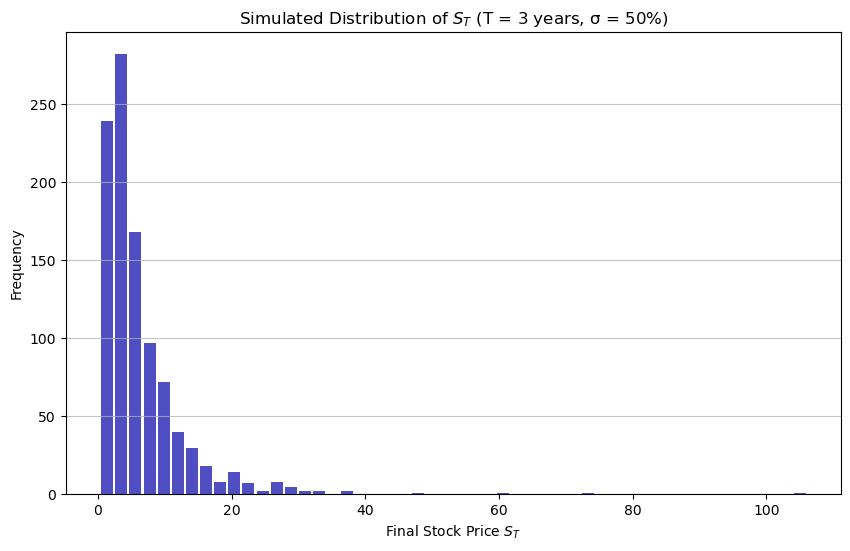

Monte Carlo Estimated Value of European Call Option: £1.2353


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Parameters for Mansory PLC ---
T = 3                     # Maturity: 3 years
r = 0.01                  # Risk-free rate: 1%
sigma = 0.5               # Volatility: 50%
S0 = 6                    # Initial stock price
K = 10                    # Strike price

# --- Step 2: Monte Carlo Simulation Function ---
def mcs_simulation_np(p):
    M = p     # Time steps
    I = p     # Simulated paths
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0

    # Generate random normal variables for simulation
    rn = np.random.standard_normal(S.shape)

    # Simulate asset price paths
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rn[t])

    return S

# --- Step 3: Run the simulation ---
S = mcs_simulation_np(1000)
S = np.transpose(S)  # Transpose so each row is a simulation path

# --- Step 4: Plot histogram of final stock prices at T=3 ---
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(x=S[:, -1], bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Final Stock Price $S_T$')
plt.ylabel('Frequency')
plt.title('Simulated Distribution of $S_T$ (T = 3 years, σ = 50%)')
plt.show()

# --- Step 5: Calculate discounted expected payoff for call option ---
call_price = np.exp(-r * T) * np.mean(np.maximum(S[:, -1] - K, 0))
print(f"Monte Carlo Estimated Value of European Call Option: £{call_price:.4f}")


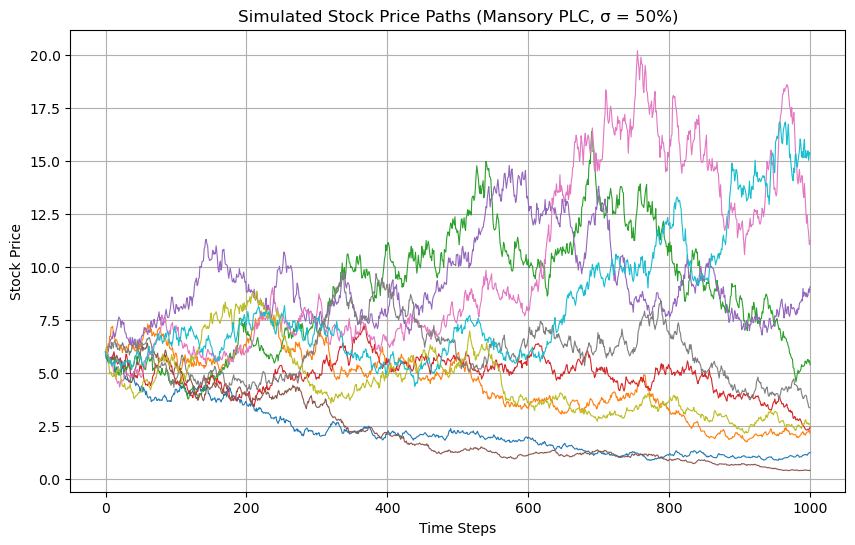

In [21]:
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot first 10 paths
    plt.plot(S[i], lw=0.8)
plt.title("Simulated Stock Price Paths (Mansory PLC, σ = 50%)")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()



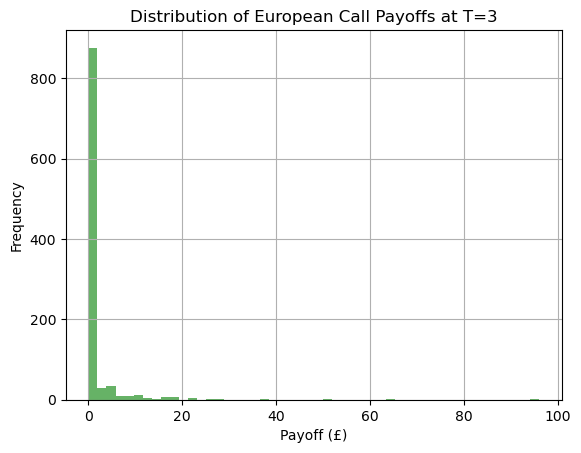

Average payoff: £ 1.2729004263976804
Discounted call value (MC): £ 1.2352805334496204


In [23]:
payoffs = np.maximum(S[:, -1] - K, 0)
plt.hist(payoffs, bins=50, color='green', alpha=0.6)
plt.title("Distribution of European Call Payoffs at T=3")
plt.xlabel("Payoff (£)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Average payoff: £", np.mean(payoffs))
print("Discounted call value (MC): £", np.exp(-r * T) * np.mean(payoffs))


In [25]:
discounted_payoffs = np.exp(-r * T) * payoffs
mean = np.mean(discounted_payoffs)
std_err = np.std(discounted_payoffs) / np.sqrt(len(discounted_payoffs))
ci_low = mean - 1.96 * std_err
ci_high = mean + 1.96 * std_err

print(f"Monte Carlo estimate: £{mean:.4f}")
print(f"95% Confidence Interval: (£{ci_low:.4f}, £{ci_high:.4f})")


Monte Carlo estimate: £1.2353
95% Confidence Interval: (£0.9171, £1.5535)


In [5]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

# === Black-Scholes Call Price ===
def euro_call_bs(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)

# === Delta of Call Option ===
def call_delta(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    return si.norm.cdf(d1)

# === Gamma of Call Option ===
def call_gamma(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    return si.norm.pdf(d1) / (S * vol * np.sqrt(T))


In [7]:
# Parameters for Mansory PLC
K = 10.0         # Strike price
T = 3            # Time to maturity (years)
r = 0.01         # Risk-free interest rate
vol = 0.5        # Assumed volatility
S = np.linspace(4, 16, 50)  # Range of stock prices

# Arrays to store results
Call = np.zeros(len(S))
Delta = np.zeros(len(S))
Gamma = np.zeros(len(S))

# Calculate values for each S
for i in range(len(S)):
    Call[i] = euro_call_bs(S[i], K, T, r, vol)
    Delta[i] = call_delta(S[i], K, T, r, vol)
    Gamma[i] = call_gamma(S[i], K, T, r, vol)


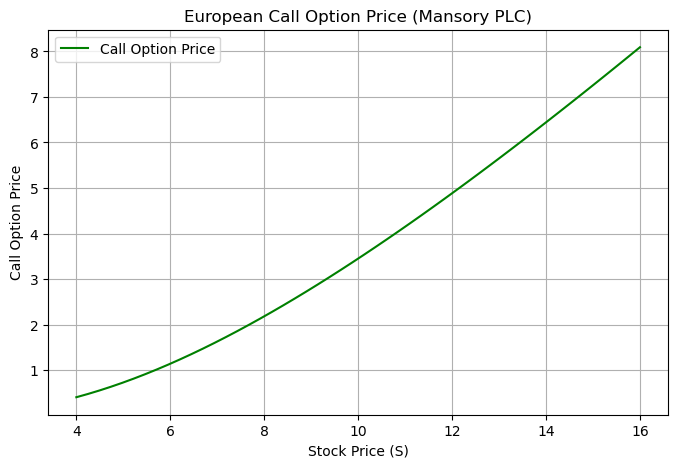

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(S, Call, label='Call Option Price', color='green')
plt.xlabel("Stock Price (S)")
plt.ylabel("Call Option Price")
plt.title("European Call Option Price (Mansory PLC)")
plt.grid()
plt.legend()
plt.show()


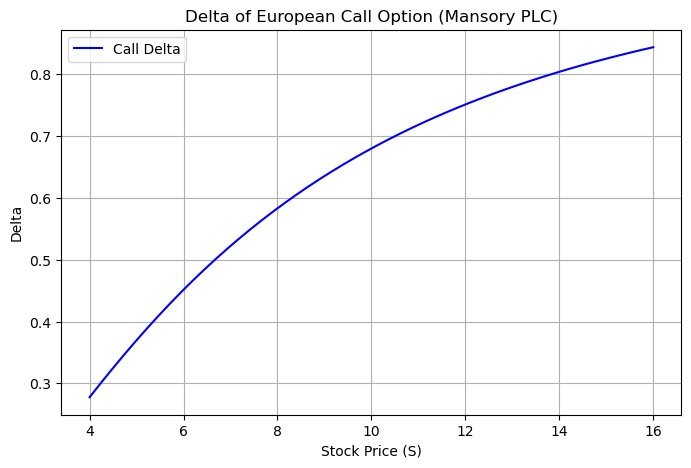

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(S, Delta, label='Call Delta', color='blue')
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.title("Delta of European Call Option (Mansory PLC)")
plt.grid()
plt.legend()
plt.show()


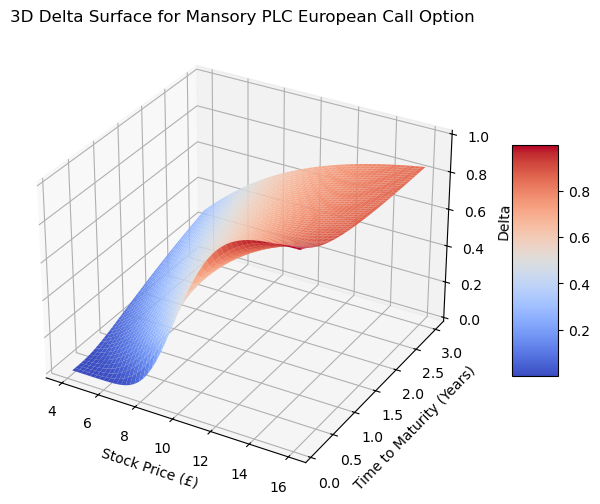

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# === Delta Function ===
def delta(S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        return si.norm.cdf(d1)
    elif payoff == "put":
        return si.norm.cdf(d1) - 1

# === Parameters for Mansory PLC ===
K = 10           # Strike price
r = 0.01         # Risk-free rate
vol = 0.5        # Volatility

# === Create ranges for Stock Prices and Time to Expiry ===
S_vals = np.linspace(4, 16, 50)       # Stock price range around the strike
T_vals = np.linspace(0.1, 3, 50)      # From 0.1 to 3 years

# === Create a meshgrid ===
S, T = np.meshgrid(S_vals, T_vals)
Delta_vals = np.zeros_like(S)

# === Fill Delta surface ===
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        Delta_vals[i, j] = delta(S[i, j], K, T[i, j], r, vol, 'call')

# === 3D Plot ===
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(S, T, Delta_vals, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

# === Axis Labels and Colorbar ===
ax.set_xlabel('Stock Price (£)')
ax.set_ylabel('Time to Maturity (Years)')
ax.set_zlabel('Delta')
ax.set_title('3D Delta Surface for Mansory PLC European Call Option')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [19]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

# === Black-Scholes Call Price ===
def euro_call_bs(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)

# === Delta of Call Option ===
def call_delta(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    return si.norm.cdf(d1)

# === Gamma of Call Option ===
def call_gamma(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    return si.norm.pdf(d1) / (S * vol * np.sqrt(T))


In [21]:
# Parameters for Mansory PLC
K = 10.0         # Strike price
T = 3            # Time to maturity (years)
r = 0.01         # Risk-free interest rate
vol = 0.5        # Assumed volatility
S = np.linspace(4, 16, 50)  # Range of stock prices

# Arrays to store results
Call = np.zeros(len(S))
Delta = np.zeros(len(S))
Gamma = np.zeros(len(S))

# Calculate values for each S
for i in range(len(S)):
    Call[i] = euro_call_bs(S[i], K, T, r, vol)
    Delta[i] = call_delta(S[i], K, T, r, vol)
    Gamma[i] = call_gamma(S[i], K, T, r, vol)


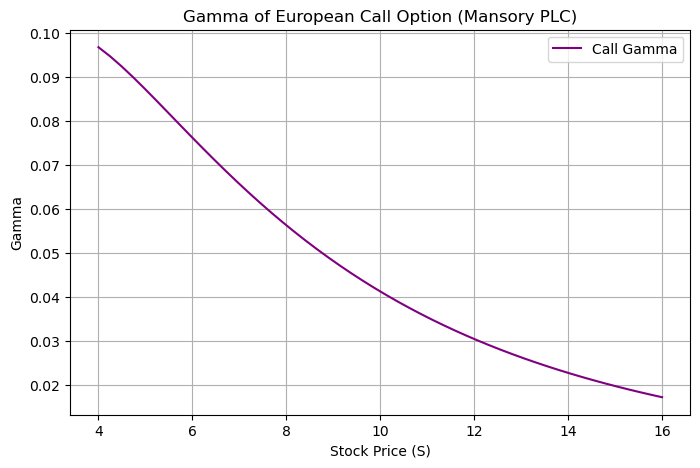

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(S, Gamma, label='Call Gamma', color='purple')
plt.xlabel("Stock Price (S)")
plt.ylabel("Gamma")
plt.title("Gamma of European Call Option (Mansory PLC)")
plt.grid()
plt.legend()
plt.show()


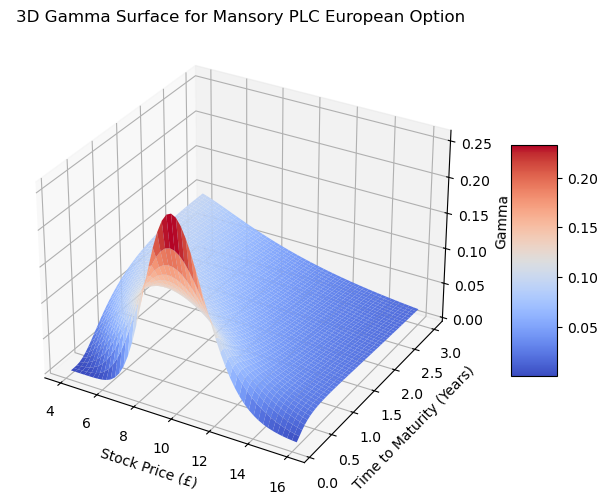

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# === Gamma Function ===
def gamma(S, K, T, r, vol):
    """
    Calculate Gamma of a European option (same for call and put).
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    return si.norm.pdf(d1) / (S * vol * np.sqrt(T))

# === Parameters for Mansory PLC ===
K = 10           # Strike price
r = 0.01         # Risk-free rate
vol = 0.5        # Volatility

# === Create ranges for Stock Prices and Time to Expiry ===
S_vals = np.linspace(4, 16, 50)       # Stock price range around the strike
T_vals = np.linspace(0.1, 3, 50)      # Time to maturity range

# === Create a meshgrid ===
S, T = np.meshgrid(S_vals, T_vals)
Gamma_vals = np.zeros_like(S)

# === Fill Gamma surface ===
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        Gamma_vals[i, j] = gamma(S[i, j], K, T[i, j], r, vol)

# === 3D Plot ===
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(S, T, Gamma_vals, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

# === Axis Labels and Colorbar ===
ax.set_xlabel('Stock Price (£)')
ax.set_ylabel('Time to Maturity (Years)')
ax.set_zlabel('Gamma')
ax.set_title('3D Gamma Surface for Mansory PLC European Option')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


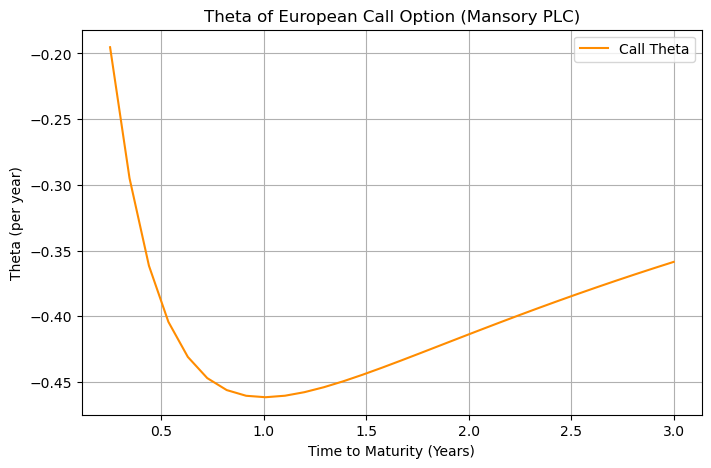

In [27]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

# === Define Theta Function ===
def call_theta(S, K, T, r, vol):
    """
    Calculates Theta for a European Call Option (Black-Scholes model).

    Parameters:
    S   : Current stock price
    K   : Strike price
    T   : Time to maturity (in years)
    r   : Risk-free interest rate
    vol : Volatility of the stock

    Returns:
    Theta value (rate of time decay per year)
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    N_prime = si.norm.pdf(d1)  # Standard normal PDF

    # Theta formula for European call
    theta = (-S * N_prime * vol / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * si.norm.cdf(d2)
    return theta


# === Parameters for Mansory PLC ===
S = 6.0       # Current stock price
K = 10.0      # Strike price
vol = 0.5     # Volatility (50%)
r = 0.01      # Risk-free interest rate

# === Varying time to maturity ===
T_values = np.linspace(0.25, 3, 30)
theta_vals = np.zeros(len(T_values))

# === Calculate theta for each T ===
for i in range(len(T_values)):
    theta_vals[i] = call_theta(S, K, T_values[i], r, vol)

# === Plot Theta vs Time to Maturity ===
plt.figure(figsize=(8, 5))
plt.plot(T_values, theta_vals, color='darkorange', label='Call Theta')
plt.grid(True)
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Theta (per year)')
plt.title('Theta of European Call Option (Mansory PLC)')
plt.legend()
plt.show()


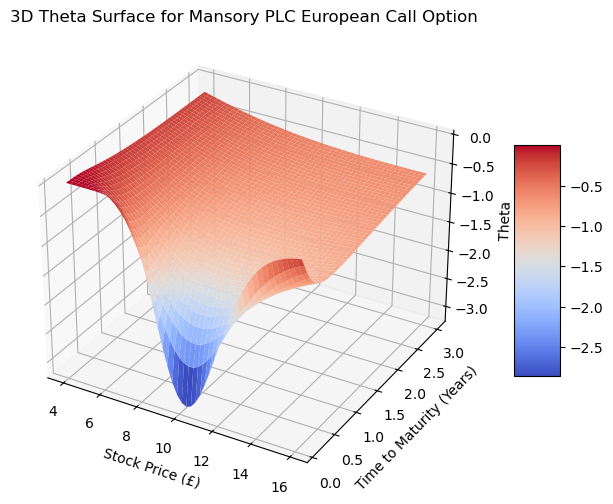

In [29]:
# === Import required libraries ===
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# === Define the Theta function using the Black-Scholes formula ===
def theta(S, K, T, r, vol, payoff):
    """
    Calculate Theta for a European call or put option.
    
    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free rate
        vol   : Volatility
        payoff: 'call' or 'put'
    
    Returns:
        Theta value (change in option price per unit time)
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    N_d1_prime = si.norm.pdf(d1)  # Standard normal PDF

    if payoff == "call":
        # Theta for call option
        return (-S * N_d1_prime * vol / (2 * np.sqrt(T))
                - r * K * np.exp(-r * T) * si.norm.cdf(d2))
    elif payoff == "put":
        # Theta for put option
        return (-S * N_d1_prime * vol / (2 * np.sqrt(T))
                + r * K * np.exp(-r * T) * si.norm.cdf(-d2))

# === Mansory PLC Parameters ===
K = 10            # Strike price (£10)
r = 0.01          # Risk-free interest rate (1%)
vol = 0.5         # Volatility estimate (50%)
S_vals = np.linspace(4, 16, 50)     # Stock prices from £4 to £16
T_vals = np.linspace(0.1, 3, 50)    # Time to expiry from 0.1 to 3 years

# === Create meshgrid for 3D surface plot ===
S, T = np.meshgrid(S_vals, T_vals)
Theta_vals = np.zeros_like(S)

# === Compute Theta for each (S, T) combination ===
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        Theta_vals[i, j] = theta(S[i, j], K, T[i, j], r, vol, 'call')

# === Plot the 3D Theta surface ===
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

# Create the surface plot with color mapping
surf = ax.plot_surface(S, T, Theta_vals,
                       cmap=plt.cm.coolwarm,
                       linewidth=0.5,
                       antialiased=True)

# Label axes
ax.set_xlabel('Stock Price (£)')
ax.set_ylabel('Time to Maturity (Years)')
ax.set_zlabel('Theta')
ax.set_title('3D Theta Surface for Mansory PLC European Call Option')

# Add color bar to interpret magnitude
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()


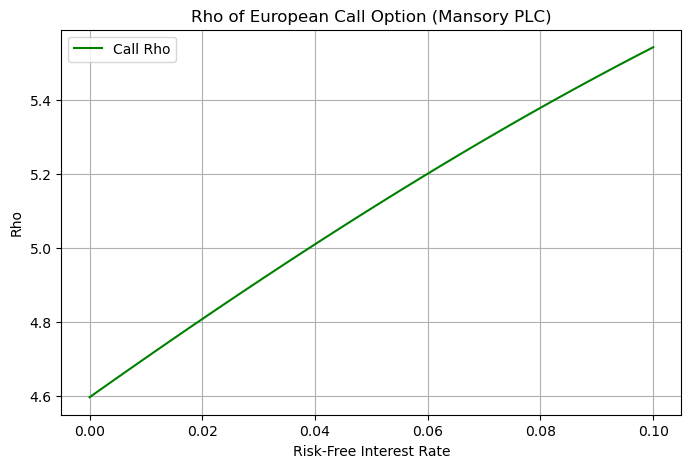

In [31]:
# === Define Rho Function ===
def call_rho(S, K, T, r, vol):
    """
    Calculates Rho for a European Call Option (Black-Scholes model).

    Parameters:
    S   : Current stock price
    K   : Strike price
    T   : Time to maturity (in years)
    r   : Risk-free interest rate
    vol : Volatility of the stock

    Returns:
    Rho value (sensitivity to interest rate)
    """
    d2 = (np.log(S / K) + (r - 0.5 * vol**2) * T) / (vol * np.sqrt(T))

    # Rho formula for European call
    rho = K * T * np.exp(-r * T) * si.norm.cdf(d2)
    return rho


# === Fixed Parameters ===
S = 6.0       # Current stock price
K = 10.0      # Strike price
T = 3         # Time to maturity (fixed at 3 years for Rho sensitivity)
vol = 0.5     # Volatility

# === Varying interest rates ===
r_values = np.linspace(0, 0.1, 30)
rho_vals = np.zeros(len(r_values))

# === Calculate rho for each interest rate ===
for i in range(len(r_values)):
    rho_vals[i] = call_rho(S, K, T, r_values[i], vol)

# === Plot Rho vs Interest Rate ===
plt.figure(figsize=(8, 5))
plt.plot(r_values, rho_vals, color='green', label='Call Rho')
plt.grid(True)
plt.xlabel('Risk-Free Interest Rate')
plt.ylabel('Rho')
plt.title('Rho of European Call Option (Mansory PLC)')
plt.legend()
plt.show()


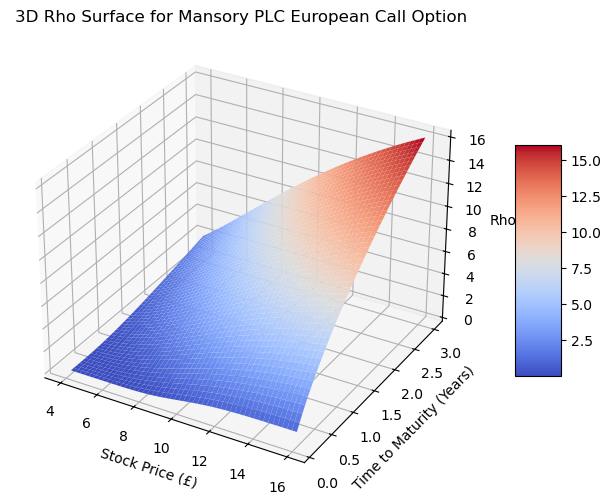

In [37]:
# === Import required libraries ===
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

# === Define the Rho function using the Black-Scholes formula ===
def rho(S, K, T, r, vol, payoff):
    """
    Calculate Rho for a European call or put option.
    
    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free rate
        vol   : Volatility
        payoff: 'call' or 'put'
    
    Returns:
        Rho value (change in option price per unit change in interest rate)
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    
    if payoff == "call":
        return K * T * np.exp(-r * T) * si.norm.cdf(d2)
    elif payoff == "put":
        return -K * T * np.exp(-r * T) * si.norm.cdf(-d2)

# === Mansory PLC Parameters ===
K = 10            # Strike price (£10)
vol = 0.5         # Volatility (50%)
r = 0.01          # Risk-free rate (1%)
S_vals = np.linspace(4, 16, 50)     # Stock prices from £4 to £16
T_vals = np.linspace(0.1, 3, 50)    # Time to expiry from 0.1 to 3 years

# === Create meshgrid for surface plot ===
S, T = np.meshgrid(S_vals, T_vals)
Rho_vals = np.zeros_like(S)

# === Compute Rho for each (S, T) combination ===
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        Rho_vals[i, j] = rho(S[i, j], K, T[i, j], r, vol, 'call')

# === Plot the 3D Rho surface ===
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(projection='3d')

# Create the surface plot
surf = ax.plot_surface(S, T, Rho_vals,
                       cmap=plt.cm.coolwarm,
                       linewidth=0.6,
                       antialiased=True)

# Label the axes and title
ax.set_xlabel('Stock Price (£)')
ax.set_ylabel('Time to Maturity (Years)')
ax.set_zlabel('Rho')
ax.set_title('3D Rho Surface for Mansory PLC European Call Option')

# Add color bar to visualize magnitude
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()


In [2]:
# === Import Required Libraries ===
import numpy as np
import scipy.stats as si

# === Define the Delta Function ===
def delta(S, K, T, r, vol, payoff):
    """
    Calculate Delta for a European call or put option using Black-Scholes.

    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility (annual)
        payoff: 'call' or 'put'

    Returns:
        Delta value (sensitivity of option price to stock price)
    """
    # Calculate d1 using the Black-Scholes formula
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    # Return Delta based on the option type
    if payoff == "call":
        return si.norm.cdf(d1)  # For call options
    elif payoff == "put":
        return si.norm.cdf(d1) - 1  # For put options

# === Mansory PLC Parameters ===
S = 6.0         # Current stock price (£6)
K = 10.0        # Strike price (£10)
T = 3           # Time to maturity (3 years)
r = 0.01        # Risk-free interest rate (1%)
vol = 0.5       # Estimated volatility (50%)

# === Calculate and Display Delta ===
delta_value = delta(S, K, T, r, vol, 'call')
print(f"Delta for Mansory PLC European Call Option: {delta_value:.4f}")


Delta for Mansory PLC European Call Option: 0.4514


In [4]:
# === Import Required Libraries ===
import numpy as np
import scipy.stats as si

# === Define the Gamma Function ===
def gamma(S, K, T, r, vol, payoff):
    """
    Calculate Gamma for a European option (same for call and put).

    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility (annual)
        payoff: 'call' or 'put' (only used for consistency; gamma is same for both)

    Returns:
        Gamma value (sensitivity of Delta to stock price)
    """
    # Step 1: Calculate d1
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    # Step 2: Gamma formula (same for call and put)
    gamma = si.norm.pdf(d1) / (vol * np.sqrt(T) * S)

    return gamma

# === Mansory PLC Parameters ===
S = 6.0         # Current stock price (£6)
K = 10.0        # Strike price (£10)
T = 3           # Time to maturity (3 years)
r = 0.01        # Risk-free interest rate (1%)
vol = 0.5       # Estimated volatility (50%)

# === Calculate and Display Gamma ===
gamma_value = gamma(S, K, T, r, vol, 'call')
print(f"Gamma for Mansory PLC European Call Option: {gamma_value:.6f}")


Gamma for Mansory PLC European Call Option: 0.076205


In [6]:
# === Import Required Libraries ===
import numpy as np
import scipy.stats as si

# === Define the Theta Function ===
def theta(S, K, T, r, vol, payoff):
    """
    Calculate Theta for a European call or put option using Black-Scholes.

    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility (annual)
        payoff: 'call' or 'put'

    Returns:
        Theta value (rate of time decay of the option value)
    """
    # Step 1: Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    # Step 2: Standard normal PDF (N'(d1))
    N_d1_prime = si.norm.pdf(d1)

    # Step 3: Calculate Theta
    if payoff == "call":
        theta = (-S * N_d1_prime * vol / (2 * np.sqrt(T))
                 - r * K * np.exp(-r * T) * si.norm.cdf(d2))
    elif payoff == "put":
        theta = (-S * N_d1_prime * vol / (2 * np.sqrt(T))
                 + r * K * np.exp(-r * T) * si.norm.cdf(-d2))

    return theta
# === Mansory PLC Parameters ===
S = 6.0         # Current stock price (£6)
K = 10.0        # Strike price (£10)
T = 3           # Time to maturity (3 years)
r = 0.01        # Risk-free interest rate (1%)
vol = 0.5       # Estimated volatility (50%)

# === Calculate and Display Theta ===
theta_value = theta(S, K, T, r, vol, 'call')
print(f"Theta for Mansory PLC European Call Option: {theta_value:.4f}")


Theta for Mansory PLC European Call Option: -0.3586


In [8]:
# === Import Required Libraries ===
import numpy as np
import scipy.stats as si

# === Define the Rho Function ===
def rho(S, K, T, r, vol, payoff):
    """
    Calculate Rho for a European call or put option using Black-Scholes.

    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility (annual)
        payoff: 'call' or 'put'

    Returns:
        Rho value (sensitivity of option price to interest rate)
    """
    # Step 1: Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)

    # Step 2: Calculate Rho
    if payoff == "call":
        return K * T * np.exp(-r * T) * si.norm.cdf(d2)
    elif payoff == "put":
        return -K * T * np.exp(-r * T) * si.norm.cdf(-d2)
# === Mansory PLC Parameters ===
S = 6.0         # Current stock price (£6)
K = 10.0        # Strike price (£10)
T = 3           # Time to maturity (3 years)
r = 0.01        # Risk-free interest rate (1%)
vol = 0.5       # Estimated volatility (50%)

# === Calculate and Display Rho ===
rho_value = rho(S, K, T, r, vol, 'call')
print(f"Rho for Mansory PLC European Call Option: {rho_value:.4f}")


Rho for Mansory PLC European Call Option: 4.7024


In [10]:
# === Import Required Libraries ===
import numpy as np
import scipy.stats as si

# === Define the Vega Function ===
def vega(S, K, T, r, vol, payoff):
    """
    Calculate Vega for a European option using the Black-Scholes formula.

    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility (annual)
        payoff: 'call' or 'put' (not used in Vega calculation; same for both)

    Returns:
        Vega value (sensitivity of option price to volatility)
    """
    # Step 1: Calculate d1
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    
    # Step 2: Vega formula (same for calls and puts)
    N_d1_prime = si.norm.pdf(d1)
    vega = S * np.sqrt(T) * N_d1_prime

    return vega
# === Mansory PLC Parameters ===
S = 6.0         # Current stock price (£6)
K = 10.0        # Strike price (£10)
T = 3           # Time to maturity (3 years)
r = 0.01        # Risk-free interest rate (1%)
vol = 0.5       # Estimated volatility (50%)

# === Calculate and Display Vega ===
vega_value = vega(S, K, T, r, vol, 'call')
print(f"Vega for Mansory PLC European Call Option: {vega_value:.4f}")


Vega for Mansory PLC European Call Option: 4.1151


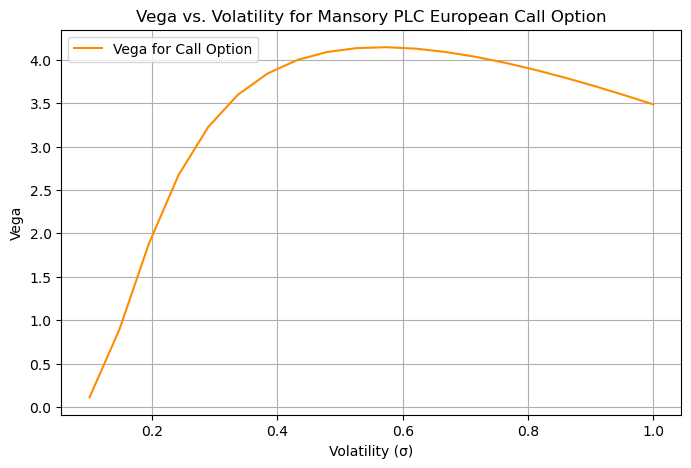

In [12]:
# === Import required libraries ===
import numpy as np
import matplotlib.pyplot as plt

# === Define Vega function ===
def vega(S, K, T, r, vol, payoff):
    """
    Calculate Vega of a European call or put option using Black-Scholes.
    
    Parameters:
        S     : Current stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility
        payoff: 'call' or 'put' (Vega is same for both)
        
    Returns:
        Vega: sensitivity of option price to volatility
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    N_d1_prime = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * d1**2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega
# === Mansory PLC parameters ===
S = 6.0         # Stock price
K = 10.0        # Strike price
T = 3           # Time to maturity
r = 0.01        # Risk-free rate

# === Volatility range to explore Vega sensitivity ===
vol_range = np.linspace(0.1, 1.0, 20)  # From 10% to 100%
Vega_vals = np.zeros_like(vol_range)

# === Calculate Vega for each volatility level ===
for i in range(len(vol_range)):
    Vega_vals[i] = vega(S, K, T, r, vol_range[i], 'call')
    

# === Plot Vega vs Volatility ===
plt.figure(figsize=(8, 5))
plt.plot(vol_range, Vega_vals, label='Vega for Call Option', color='darkorange')
plt.grid(True)
plt.xlabel('Volatility (σ)')
plt.ylabel('Vega')
plt.title('Vega vs. Volatility for Mansory PLC European Call Option')
plt.legend()
plt.show()


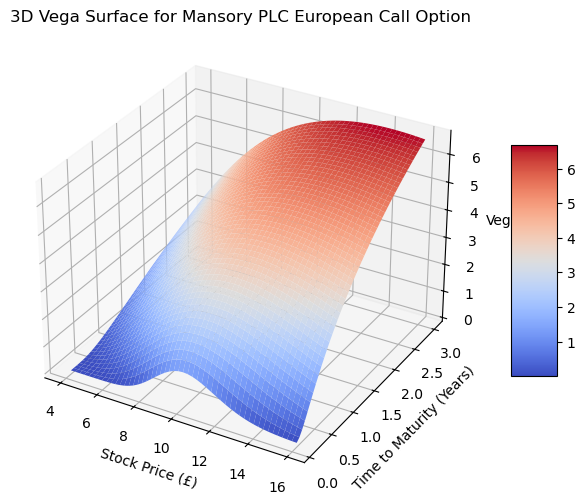

In [14]:
# === Import required libraries ===
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Define the Vega function ===
def vega(S, K, T, r, vol, payoff):
    """
    Calculate Vega of a European option using Black-Scholes formula.

    Parameters:
        S     : Stock price
        K     : Strike price
        T     : Time to maturity (in years)
        r     : Risk-free interest rate
        vol   : Volatility
        payoff: 'call' or 'put' (Vega is same for both)

    Returns:
        Vega: sensitivity of option value to volatility
    """
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    N_d1_prime = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * d1**2)
    vega = S * np.sqrt(T) * N_d1_prime
    return vega
# === Mansory PLC option setup ===
K = 10.0         # Strike price
r = 0.01         # Risk-free rate
vol = 0.5        # Assumed volatility

# === Define range of stock prices and maturities ===
S_vals = np.linspace(4, 16, 50)       # From £4 to £16
T_vals = np.linspace(0.1, 3, 50)      # From 0.1 to 3 years

# === Create meshgrid for surface plot ===
S, T = np.meshgrid(S_vals, T_vals)
Vega_vals = np.zeros_like(S)

# === Compute Vega for each (S, T) pair ===
for i in range(S.shape[0]):
    for j in range(S.shape[1]):
        Vega_vals[i, j] = vega(S[i, j], K, T[i, j], r, vol, 'call')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

# Surface plot
surf = ax.plot_surface(S, T, Vega_vals,
                       cmap=plt.cm.coolwarm,
                       linewidth=0.5,
                       antialiased=True)

# Axis labels
ax.set_xlabel('Stock Price (£)')
ax.set_ylabel('Time to Maturity (Years)')
ax.set_zlabel('Vega')
ax.set_title('3D Vega Surface for Mansory PLC European Call Option')

# Color bar for interpretation
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si

# === Black-Scholes Delta Function ===
def delta(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    return si.norm.cdf(d1)

# === Simulate stock price path using Geometric Brownian Motion ===
def simulate_stock_path(S0, T, r, sigma, steps):
    dt = T / steps
    Z = np.random.standard_normal(steps)
    S = np.zeros(steps + 1)
    S[0] = S0
    for t in range(1, steps + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
    return S

# === Delta Hedging Simulation ===
def delta_hedge(S0, K, T, r, sigma, steps):
    dt = T / steps
    S_path = simulate_stock_path(S0, T, r, sigma, steps)
    cash_position = 0
    shares_held = 0
    deltas = []
    
    for t in range(steps):
        time_left = T - t * dt
        d = delta(S_path[t], K, time_left, r, sigma)
        deltas.append(d)
        
        # Rebalance hedge
        delta_diff = d - shares_held
        cost = delta_diff * S_path[t]
        cash_position -= cost
        shares_held = d
        
        # Earn risk-free interest on cash
        cash_position *= np.exp(r * dt)

    # Final hedge payoff (short the call, long delta shares)
    option_payoff = max(S_path[-1] - K, 0)
    portfolio_value = shares_held * S_path[-1] + cash_position - option_payoff
    
    return {
        "Stock Path": S_path,
        "Delta Path": deltas,
        "Final Option Payoff": option_payoff,
        "Final Hedge Value": portfolio_value
    }


Final Option Payoff: £0.00
Final Hedge Value (should be ~0): £-0.35


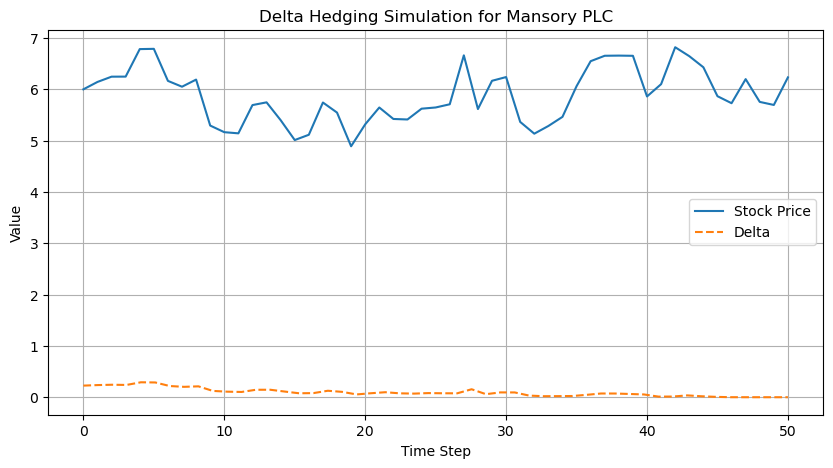

In [20]:
# Parameters for Mansory PLC
S0 = 6.0       # Initial stock price
K = 10.0       # Strike price
T = 1.0        # Shortened to 1 year for simulation
r = 0.01       # Risk-free rate
sigma = 0.5    # Volatility
steps = 50     # Rebalancing steps

# Run delta hedging simulation
result = delta_hedge(S0, K, T, r, sigma, steps)

# Output final results
print(f"Final Option Payoff: £{result['Final Option Payoff']:.2f}")
print(f"Final Hedge Value (should be ~0): £{result['Final Hedge Value']:.2f}")

# Plot stock path and delta over time
plt.figure(figsize=(10, 5))
plt.plot(result['Stock Path'], label='Stock Price')
plt.plot(np.linspace(0, steps, steps), result['Delta Path'], label='Delta', linestyle='--')
plt.title("Delta Hedging Simulation for Mansory PLC")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
